In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with = engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement =Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
Base.metadata.tables

FacadeDict({'measurement': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [10]:
inspector = inspect(engine)

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns2 = inspector.get_columns('station')
for column in columns2:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [14]:
import datetime as dt
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores of last year of data
precipitation_data = session.query(Measurement.date, Measurement.prcp) \
    .filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23") \
    .all()
precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

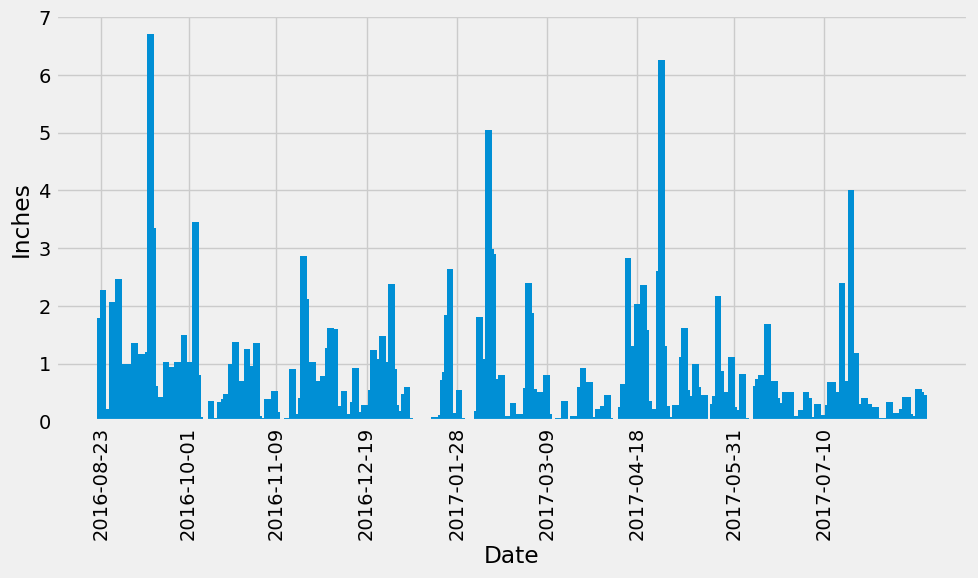

In [18]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Convert the 'Date' column to datetime type
#df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Precipitation'], width=3)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(df['Date'][::250], rotation=90)  # Show dates in intervals of 250
plt.tight_layout()
plt.show()



In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).distinct().count()


9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
Base.metadata.tables

FacadeDict({'measurement': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
    func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
    

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
frequency_count = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").\
    group_by(Measurement.tobs).\
    order_by(Measurement.tobs).all()
frequency_count

[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 31),
 (78.0, 22),
 (79.0, 18),
 (80.0, 11),
 (81.0, 4),
 (82.0, 3),
 (83.0, 1)]

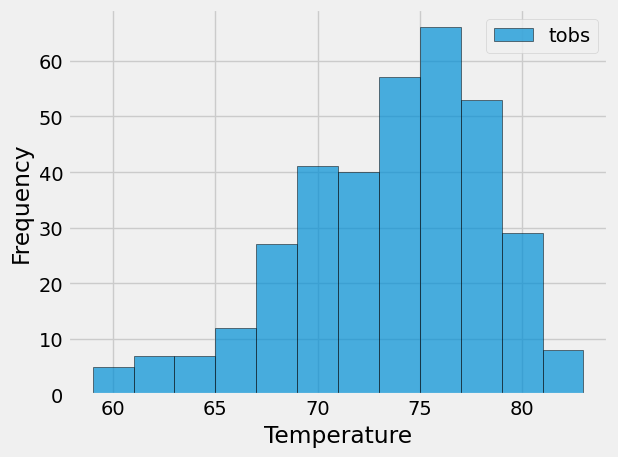

In [25]:

temperatures = [temp for temp, count in frequency_count]
frequency = [count for temp, count in frequency_count]

plt.hist(temperatures, bins=12, edgecolor='black', alpha=0.7, weights=frequency, label='tobs')

plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



# Close Session

In [12]:
results2 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >='2015-08-23').all()
results2

[('2015-08-23', 81.0),
 ('2015-08-24', 74.0),
 ('2015-08-25', 79.0),
 ('2015-08-26', 77.0),
 ('2015-08-27', 77.0),
 ('2015-08-28', 81.0),
 ('2015-08-29', 82.0),
 ('2015-08-30', 81.0),
 ('2015-08-31', 81.0),
 ('2015-09-01', 80.0),
 ('2015-09-02', 80.0),
 ('2015-09-03', 77.0),
 ('2015-09-04', 77.0),
 ('2015-09-05', 80.0),
 ('2015-09-06', 78.0),
 ('2015-09-07', 79.0),
 ('2015-09-08', 81.0),
 ('2015-09-09', 80.0),
 ('2015-09-10', 79.0),
 ('2015-09-11', 79.0),
 ('2015-09-12', 76.0),
 ('2015-09-13', 79.0),
 ('2015-09-14', 78.0),
 ('2015-09-15', 78.0),
 ('2015-09-16', 81.0),
 ('2015-09-17', 81.0),
 ('2015-09-18', 81.0),
 ('2015-09-19', 83.0),
 ('2015-09-20', 82.0),
 ('2015-09-21', 79.0),
 ('2015-09-22', 81.0),
 ('2015-09-23', 80.0),
 ('2015-09-24', 81.0),
 ('2015-09-25', 81.0),
 ('2015-09-26', 80.0),
 ('2015-09-27', 79.0),
 ('2015-09-28', 79.0),
 ('2015-09-29', 78.0),
 ('2015-09-30', 80.0),
 ('2015-10-01', 76.0),
 ('2015-10-02', 79.0),
 ('2015-10-03', 79.0),
 ('2015-10-04', 79.0),
 ('2015-10-

In [26]:
# Close Session
session.close()